In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import os

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\HCC_Lu\HCC_Lu_preprocessed_noscale.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/HCC_Lu/HCC_Lu_preprocessed_noscale.h5ad')
adata = sc.read_h5ad(dataset_dir / 'HCC_Lu/HCC_Lu_preprocessed_noscale.h5ad')
clusters = [f'Leiden_{i}' for i in range(24)]
print(clusters)

['Leiden_0', 'Leiden_1', 'Leiden_2', 'Leiden_3', 'Leiden_4', 'Leiden_5', 'Leiden_6', 'Leiden_7', 'Leiden_8', 'Leiden_9', 'Leiden_10', 'Leiden_11', 'Leiden_12', 'Leiden_13', 'Leiden_14', 'Leiden_15', 'Leiden_16', 'Leiden_17', 'Leiden_18', 'Leiden_19', 'Leiden_20', 'Leiden_21', 'Leiden_22', 'Leiden_23']


c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


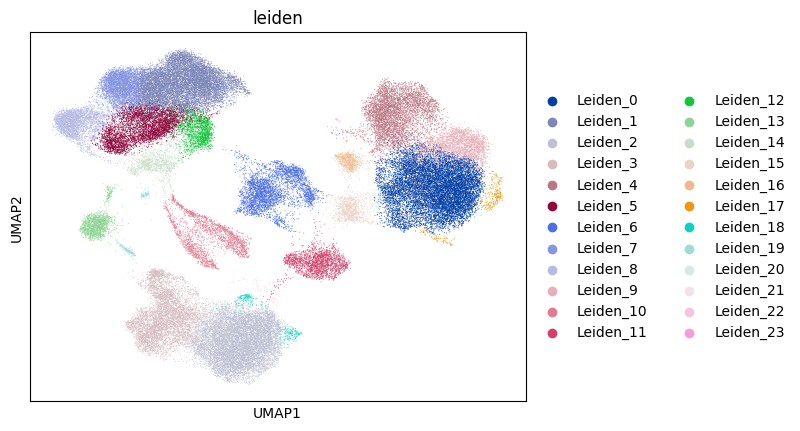

In [3]:
# UMAP embedding in adata
sc.pl.umap(adata, color=['leiden'])

In [5]:
# annotate the group of ribosomal genes as "rb"
adata.var["rb"] = adata.var_names.str.startswith("RPL") | adata.var_names.str.startswith("RPS")

In [6]:
adata.var.head()

,rb
RP11-34P13.7,False
FO538757.2,False
AP006222.2,False
RP4-669L17.10,False
RP5-857K21.4,False


In [7]:
sum(adata.var['rb'])

101

In [8]:
ribo_genes = adata.var.loc[adata.var['rb']].index.tolist()
ribo_genes

['RPL22',
 'RPL11',
 'RPS6KA1',
 'RPS8',
 'RPL5',
 'RPS27',
 'RPS6KC1',
 'RPS7',
 'RPS27A',
 'RPL31',
 'RPL37A',
 'RPL32',
 'RPL15',
 'RPSA',
 'RPL14',
 'RPL29',
 'RPL24',
 'RPL22L1',
 'RPL39L',
 'RPL35A',
 'RPL9',
 'RPL34-AS1',
 'RPL34',
 'RPS3A',
 'RPL37',
 'RPS23',
 'RPS14',
 'RPL26L1',
 'RPS18',
 'RPS10-NUDT3',
 'RPS10',
 'RPL10A',
 'RPL7L1',
 'RPS12',
 'RPS6KA2',
 'RPS6KA3',
 'RPS4X',
 'RPL36A',
 'RPL39',
 'RPL10',
 'RPS20',
 'RPL7',
 'RPL30',
 'RPL8',
 'RPS6',
 'RPL35',
 'RPL12',
 'RPL7A',
 'RPLP2',
 'RPL27A',
 'RPS13',
 'RPS6KA4',
 'RPS6KB2',
 'RPS3',
 'RPS25',
 'RPS24',
 'RPS26',
 'RPL41',
 'RPL6',
 'RPLP0',
 'RPL21',
 'RPS29',
 'RPL36AL',
 'RPS6KL1',
 'RPS6KA5',
 'RPS27L',
 'RPL4',
 'RPLP1',
 'RPS17',
 'RPS2',
 'RPS15A',
 'RPL13',
 'RPL26',
 'RPL23A',
 'RPL23',
 'RPL19',
 'RPL27',
 'RPS6KB1',
 'RPL38',
 'RPL17-C18orf32',
 'RPL17',
 'RPS21',
 'RPS15',
 'RPL36',
 'RPS28',
 'RPL18A',
 'RPS16',
 'RPS19',
 'RPL18',
 'RPL13A',
 'RPS11',
 'RPS9',
 'RPL28',
 'RPS5',
 'RPS4Y1',
 'RPL3'

In [9]:
# sc.pl.umap(adata, color=mito_genes)

## Mean Ribosomal gene expression per cell

In [10]:
adata_ribo = adata[:, ribo_genes]
adata_ribo.shape

(71915, 101)

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate the mean expression of mitochondrial genes for each cell (row mean)
adata_ribo.obs['mean_ribo_expr'] = adata_ribo.X.mean(axis=1)

# Convert to DataFrame for easy grouping and plotting
df = pd.DataFrame({
    'mean_ribo_expr': adata_ribo.obs['mean_ribo_expr'],
    'leiden': adata_ribo.obs['leiden']
})

# # Group by 'leiden' and calculate the mean of mitochondrial gene expression per cluster
# mean_expr_by_cluster = df.groupby('leiden').mean()

# # Plot the mean mitochondrial gene expression across leiden clusters
# plt.figure(figsize=(12, 6))
# mean_expr_by_cluster.plot(kind='bar', legend=False)
# plt.title('Mean Mitochondrial Gene Expression Across Leiden Clusters')
# plt.xlabel('Leiden Clusters')
# plt.ylabel('Mean Mitochondrial Gene Expression')
# plt.xticks(rotation=45)
# plt.show()


C:\Users\evanlee\AppData\Local\Temp\ipykernel_72432\2131704302.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ribo.obs['mean_ribo_expr'] = adata_ribo.X.mean(axis=1)


In [13]:
df

,mean_ribo_expr,leiden
HCC01T_AAACCTGAGGGCATGT,2.219344,Leiden_5
HCC01T_AAACCTGAGTCGCCGT,2.246906,Leiden_3
HCC01T_AAACCTGCATTACCTT,1.755100,Leiden_5
HCC01T_AAACCTGGTCACACGC,2.281784,Leiden_1
HCC01T_AAACCTGTCCAGTATG,2.360475,Leiden_1
...,...,...
HCC06T_TTTGTCACAGTATGCT,0.812603,Leiden_10
HCC06T_TTTGTCAGTCCAAGTT,1.436237,Leiden_10
HCC06T_TTTGTCAGTTTGCATG,1.604983,Leiden_2
HCC06T_TTTGTCATCCTGTACC,1.811784,Leiden_3


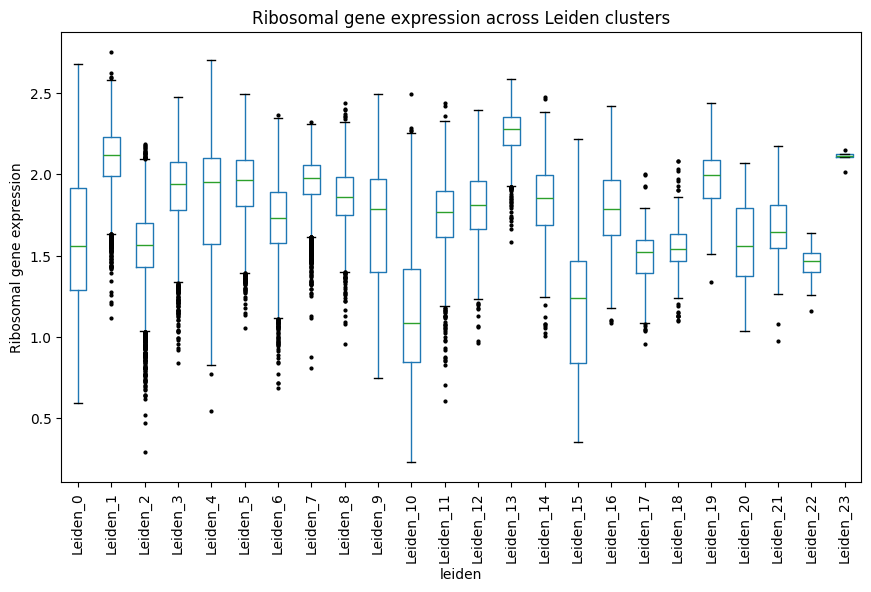

In [14]:
# plt.figure(figsize=(10, 6))
df.boxplot(column='mean_ribo_expr', by='leiden', grid=False, flierprops={'marker': 'o', 'markersize': 2, 'markerfacecolor': 'black'}, figsize=(10, 6))
plt.title("Ribosomal gene expression across Leiden clusters")
plt.suptitle('')  # Removes default matplotlib supertitle
# plt.xlabel("Leiden Clusters")
plt.ylabel("Ribosomal gene expression")
plt.xticks(rotation=90)
plt.show()